# Boston House Price Prediction


## Problem Statement



House prices are an important reflection of the economy, and these price ranges are of great interest for both buyers and sellers. If you ask a home buyer to describe their dream house, they probably won’t begin with the height of the basement ceiling or the proximity to an east-west railroad. But this Boston house price data-set proves that much more influences price negotiations more on the number of bedrooms or a white-picket fence.

We will be performing the following steps to train and test our model for this project.

- 1. Collecting the data
- 2. Exploratory data analysis
- 3. Data Cleaning
- 4. Training the Model 
- 5. Deploying the Model
- 6. Price Prediction
- 7. Delete Endpoints




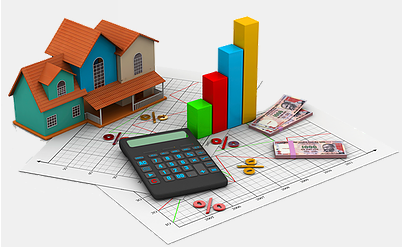

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 

%matplotlib inline

import scipy.stats as stats
import sklearn
from sklearn.model_selection import train_test_split
from matplotlib import rcParams
sns.set_style('whitegrid')
sns.set_context('poster')


import boto3
import sagemaker
from sagemaker import get_execution_role

#boto3 is the AWS SDK for Python. 
#Boto3 makes it easy to integrate your Python application, library, or script with AWS services 
#including Amazon S3, Amazon EC2, Amazon DynamoDB, and more.

## 1. Collecting the Data
**Loading Dataset from Sklearn**

Sklearn Library contains a variety of pre-stored datasets, Boston House price dataset is one of them. And this time we will import the data direct from the library.

In [2]:
# Importing Boston Housing Dataset from sklearn datasets and storing inside a variable called boston

from sklearn.datasets import load_boston

boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Calif

In [3]:
# determines that the dataset has 506 rows and 13 coloumns
boston.data.shape

(506, 13)

### Describing the Dataset

Lets look into the features (columns) information which is contained within the loaded dataset.

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# Determines the column names 
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### Converting our loaded data into data frames by applying Panda library functions.

In [5]:
#converting boston data into pandas dataframe using pd.Dataframe()

boston_df = pd.DataFrame(boston.data)
boston_df.head()

0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33

In [6]:
# Replacing column heading integers with respective feature names.
boston_df.columns = boston.feature_names
boston_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [7]:
# Adding "Price" as another feature in the current dataset
boston_df['PRICE'] = boston.target
boston_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [8]:
boston_df.shape

(506, 14)

Now the shape of the dataset is changed to 14 columns as we have added a PRICE feature to our dataset. 

## 2. Exploratory Data Analysis

**Dataset Statistics**


In [9]:
# Summary of each columns using describe()
boston_df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [10]:
# Finding out the correlation between the features
corr = boston_df.corr()
corr.shape

(14, 14)

**Features Heatmap**

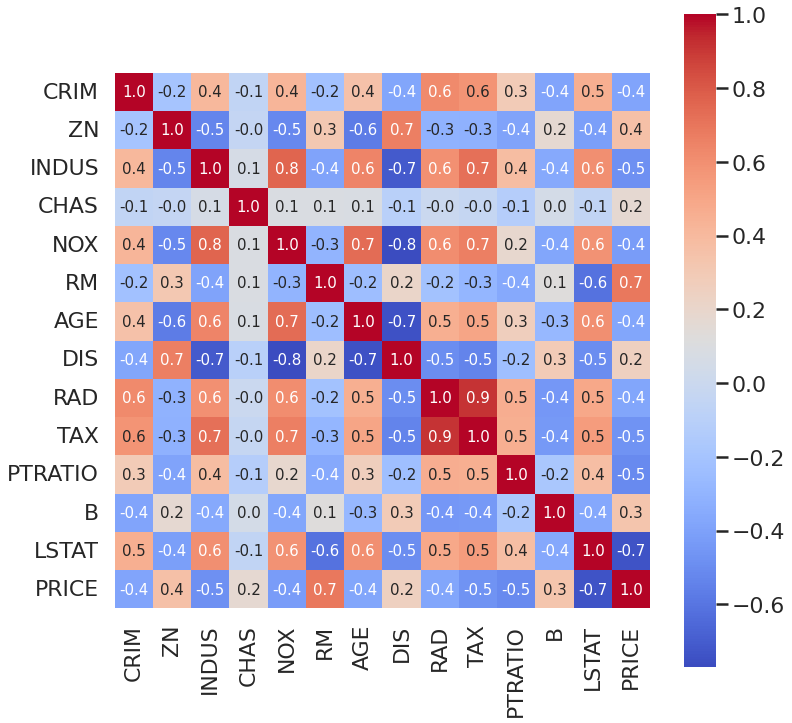

In [13]:
# Plotting the heatmap of correlation between features

plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='coolwarm');

The picture above tells us the correlation relationships among different features of the data. 

- As we have learned previously, the positive signs represents a positive correlation between the two features, on the other hand the negative sign represents a negative correlation between the same.
- We will be looking at the different features, to know which feature have better correlation with the dependent variable (Predicted Output 'PRICE').

Lets have some visual look at the same heatmap.

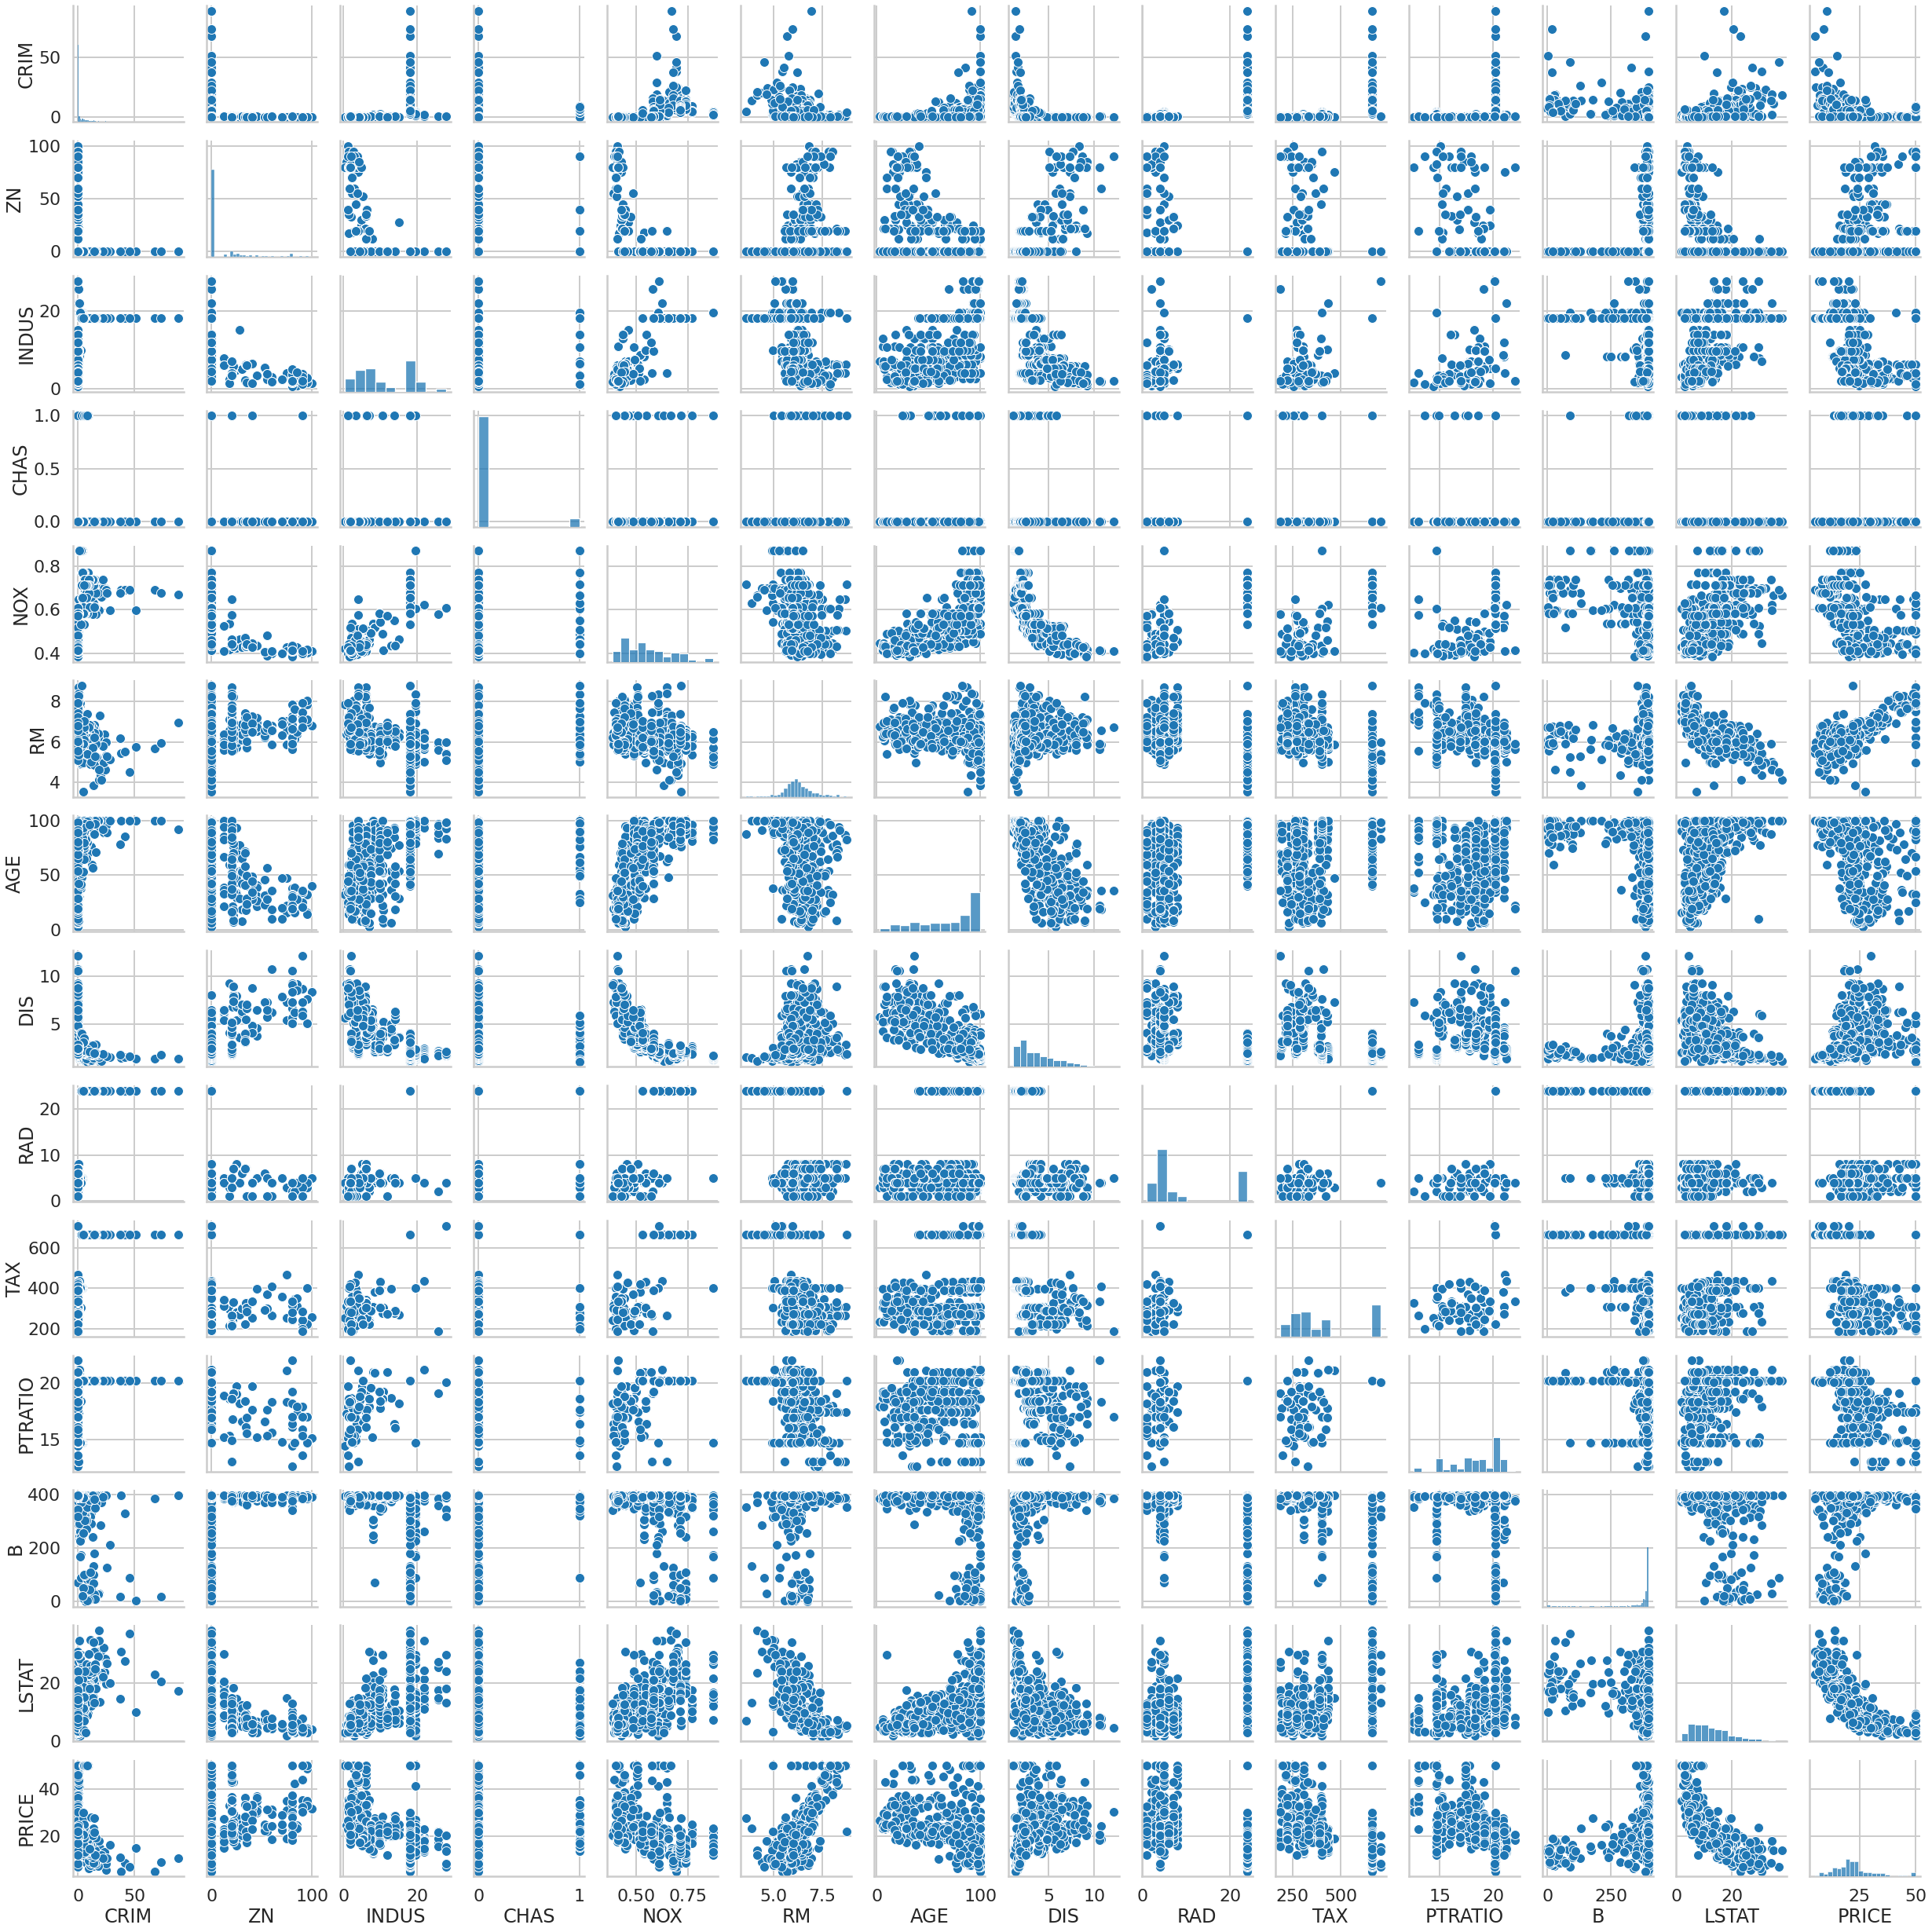

In [14]:
sns.pairplot(data=boston_df)

- It can be observed that RM, TAX, PTRATIO and LSTAT shows some good correaltion with PRICE.

**So we will explore these 4 features in more detail.**

In [16]:
#Since now we are interested in only 4 features in correlation with PRICE lets consider them. . . .
boston_df1 = boston_df[['RM','TAX','PTRATIO','LSTAT','PRICE']]
boston_df1.head()

RM    TAX  PTRATIO  LSTAT  PRICE
0  6.575  296.0     15.3   4.98   24.0
1  6.421  242.0     17.8   9.14   21.6
2  7.185  242.0     17.8   4.03   34.7
3  6.998  222.0     18.7   2.94   33.4
4  7.147  222.0     18.7   5.33   36.2

Looking at the correlation for the features we are more interested in

In [17]:
# Finding out the correlation between the features
corr1 = boston_df1.corr()
corr1.shape


(5, 5)

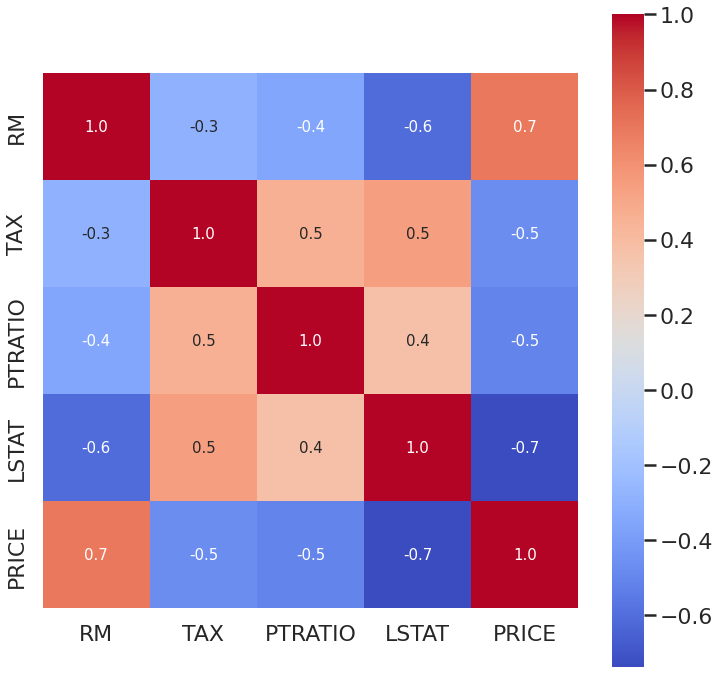

In [18]:
# Plotting the heatmap of correlation between features

plt.figure(figsize=(12,12))
sns.heatmap(corr1, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='coolwarm');

In [19]:
boston_df1.corr()

RM       TAX   PTRATIO     LSTAT     PRICE
RM       1.000000 -0.292048 -0.355501 -0.613808  0.695360
TAX     -0.292048  1.000000  0.460853  0.543993 -0.468536
PTRATIO -0.355501  0.460853  1.000000  0.374044 -0.507787
LSTAT   -0.613808  0.543993  0.374044  1.000000 -0.737663
PRICE    0.695360 -0.468536 -0.507787 -0.737663  1.000000

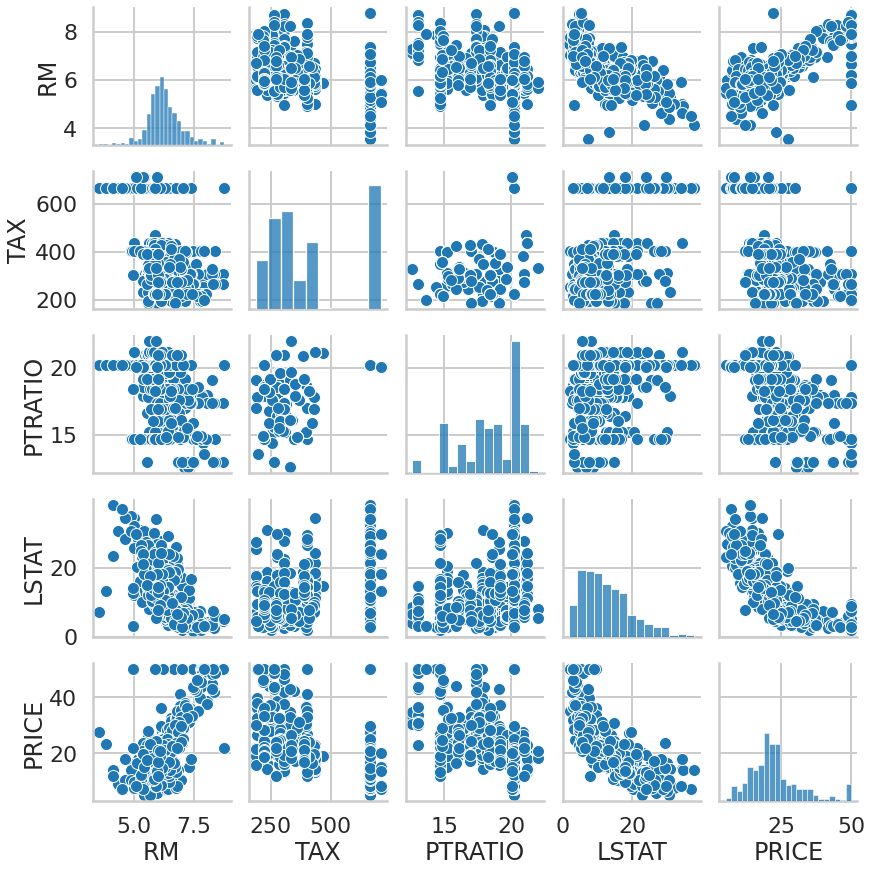

In [20]:
sns.pairplot(data=boston_df1)

These 5x5 figures above helps us to understand how data in each variable (feature) is distributed with itself and with others.

**What did we Observe?**

- RM, LSTAT and PRICE are normally distributed.
- RM and LSTAT shows good linear relationship with PRICE.
- Some outliers can be observed in TAX and PRICE that needs to be eliminated.

In [21]:
#description about data
desc = boston_df1.describe().round(2)
desc

RM     TAX  PTRATIO   LSTAT   PRICE
count  506.00  506.00   506.00  506.00  506.00
mean     6.28  408.24    18.46   12.65   22.53
std      0.70  168.54     2.16    7.14    9.20
min      3.56  187.00    12.60    1.73    5.00
25%      5.89  279.00    17.40    6.95   17.02
50%      6.21  330.00    19.05   11.36   21.20
75%      6.62  666.00    20.20   16.96   25.00
max      8.78  711.00    22.00   37.97   50.00

## Understanding the Features Corelation 

#### Relation between No. of Rooms and PRICE

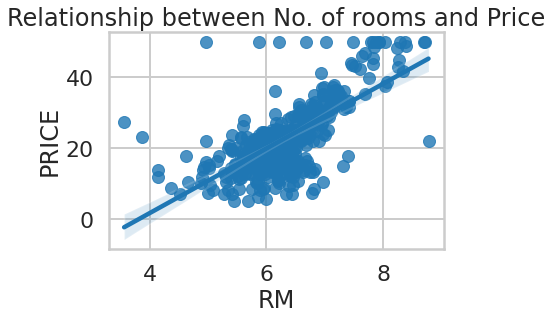

In [22]:
# Between prices and No. of rooms
sns.regplot(x = "RM",y = "PRICE", data=boston_df, fit_reg=True)
plt.title("Relationship between No. of rooms and Price")
plt.show()

We can see a positive correlation between no. of rooms and price. 
- No. of rooms increases with increase in price.
- No. of rooms decreases with decrease in price.


#### Relation between Lower Status Population LSTAT and PRICE

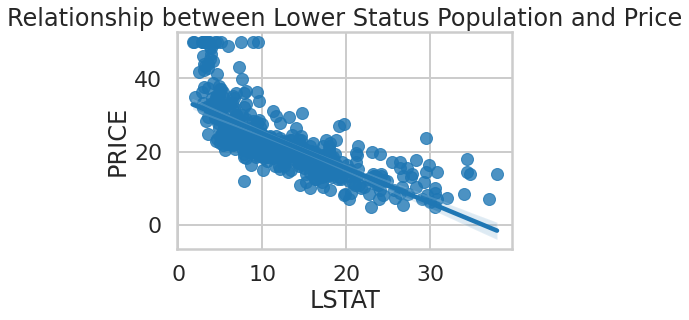

In [23]:
# Between prices and Lower Status Population
sns.regplot(y = "PRICE",x = "LSTAT", data=boston_df, fit_reg= True)
plt.title("Relationship between Lower Status Population and Price")
plt.show()

We can see a negative correlation between lower status population and price. 
- Population of lower status  increases with decrease in price.
- Population of lower status  decreases with increase in price.

#### Relation between TAX and PRICE

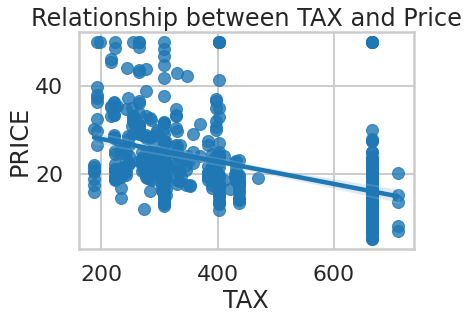

In [24]:
# Between prices and TAX
sns.regplot(y = "PRICE",x = "TAX", data=boston_df, fit_reg= True)
plt.title("Relationship between TAX and Price")
plt.show()

We see a direct correlation between the TAX and PRICE, the more the price of the house the more the tax for that.

#### Relation between PRATION and PRICE

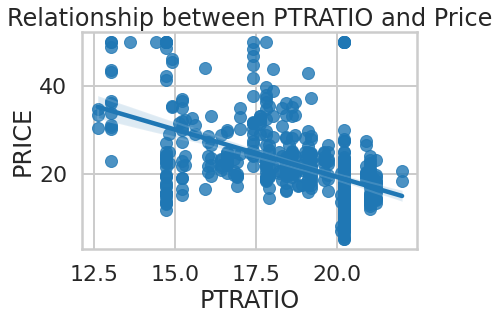

In [27]:
# Between prices and PTRATIO
sns.regplot(y = "PRICE",x = "PTRATIO", data=boston_df, fit_reg= True)
plt.title("Relationship between PTRATIO and Price")
plt.show()

We see a sort of negative correlation between the PTRATIO and the PRICE.

### Univariate and Multivariate Analysis

#### Analysing the PRICE 

/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


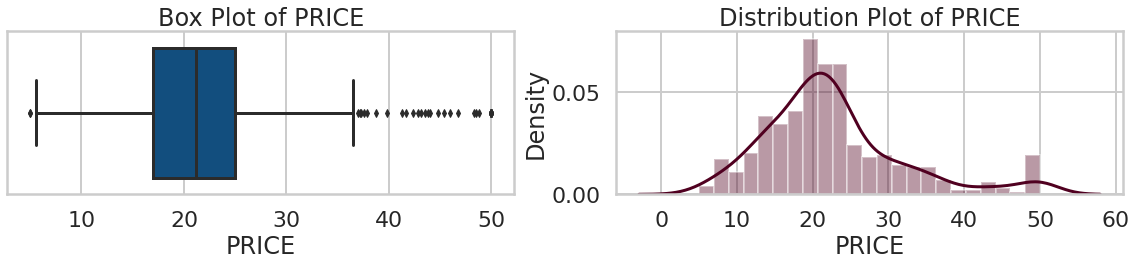

In [28]:
#Box Plot and Distribution Plot for Dependent variable MEDV
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(boston_df1.PRICE,color='#005090')
plt.title('Box Plot of PRICE')

plt.subplot(1,2,2)
sns.distplot(a = boston_df1.PRICE,color='#500020')
plt.title('Distribution Plot of PRICE')
plt.show()

**What did we Observe?**
- PRICE is normally distributed
- It contains some extreme values which could be potential outliers

Using the pre-requisite knowledge of Outliers we will observe data points which lies outside wiskers.

 Q3 + 1.5 IQR < Potential Outliers < Q1 - 1.5 IQR

- Q3 -> Quartile 3, Under which 75% of data lies
- Q1 -> Quartile 1, Under which 25% of data lies
- IQR -> Inter-Quartile Range, Q3 - Q1



In [29]:
PRICE_Q3 = desc['PRICE']['75%']
PRICE_Q1 = desc['PRICE']['25%']
PRICE_IQR = PRICE_Q3 - PRICE_Q1
PRICE_UV = PRICE_Q3 + 1.5*PRICE_IQR
PRICE_LV = PRICE_Q1 - 1.5*PRICE_IQR

boston_df1[boston_df1['PRICE'] < PRICE_LV]

RM    TAX  PTRATIO  LSTAT  PRICE
398  5.453  666.0     20.2  30.59    5.0
405  5.683  666.0     20.2  22.98    5.0

**What did we Observe?**

- For the above two low house prices, we see that TAX = 666 which is very high for a house having 5 rooms.
- For the above two low house prices, we see that LSTAT is also high.

**Conclusion on Observation**

- As both TAX and LSTAT are negatively correlated to PRICE this means higher the TAX and LSTAT lower will be the house price and vica-versa.
- This gives some meaning to the two values, therefore we will keep them.

In [30]:
boston_df1[boston_df1['PRICE']>PRICE_UV].sort_values(by=['PRICE','RM'])

RM    TAX  PTRATIO  LSTAT  PRICE
190  6.951  398.0     15.2   5.10   37.0
179  6.980  193.0     17.8   5.04   37.2
291  7.148  245.0     19.2   3.56   37.3
226  8.040  307.0     17.4   3.13   37.6
182  7.155  193.0     17.8   4.82   37.9
97   8.069  276.0     18.0   4.21   38.7
180  7.765  193.0     17.8   7.56   39.8
157  6.943  403.0     14.7   4.59   41.3
232  8.337  307.0     17.4   2.47   41.7
202  7.610  348.0     14.7   3.11   42.3
253  8.259  330.0     19.1   3.54   42.8
261  7.520  264.0     13.0   7.26   43.1
268  7.470  264.0     13.0   3.16   43.5
98   7.820  276.0     18.0   3.57   43.8
256  7.454  244.0     15.9   3.11   44.0
224  8.266  307.0     17.4   4.14   44.8
280  7.820  216.0     14.9   3.76   45.4
282  7.645  216.0     14.9   3.01   46.0
228  7.686  307.0     17.4   3.92   46.7
233  8.247  307.0     17.4   3.95   48.3
203  7.853  224.0     14.7   3.81   48.5
262  8.398  264.0     13.0   5.91   48.8
368  4.970  666.0     20.2   3.26   50.0
372  5.875  666.0     20.2   8.88   50.0
371  6.216  666.0     20.2   9.53   50.0
369  6.683  666.0     20.2   3.73   50.0
370  7.016  666.0     20.2   2.96   50.0
161  7.489  403.0     14.7   1.73   50.0
162  7.802  403.0     14.7   1.92   50.0
186  7.831  193.0     17.8   4.45   50.0
195  7.875  255.0     14.4   2.97   50.0
283  7.923  198.0     13.6   3.16   50.0
166  7.929  403.0     14.7   3.70   50.0
204  8.034  224.0     14.7   2.88   50.0
267  8.297  264.0     13.0   7.44   50.0
163  8.375  403.0     14.7   3.32   50.0
257  8.704  264.0     13.0   5.12   50.0
225  8.725  307.0     17.4   4.63   50.0

**What did we Observe?**

- We see that houses having prices = 50, the number of Room ranges from 5 to 9 which is unusual. 
- Also for these houses TAX ranges from low to high.
- For houses price between 37 to less than 50, RM is higher than 75% of the total data points. Since RM is positively correlated to PRICE, this can be a possible reason for little higher house prices.
- Also for these houses PTRATIO and LSTAT lies in 25% - 50% of the total observation respectively. Since PTRATIO and LSAT are negatively correlated to PRICE this can be reason for little higher house prices.

**Conslusion for Observation**

- We will drop the data points for houses having price = 50 as these tend to be outliers and can be a cause of possible problem towards better prediction rate.
- We will keep the data points for houses having price range between 37 to 49 as they do not have any unusual behaviour among them.

In [31]:
print(f'Shape of dataset before removing Outliers: {boston_df1.shape}')
boston_df2 = boston_df1[~(boston_df1['PRICE']==50)]
print(f'Shape of dataset after removing Outliers: {boston_df2.shape}')

Shape of dataset before removing Outliers: (506, 5)
Shape of dataset after removing Outliers: (490, 5)


As we can see that we have deleted 16 rows from out dataset having PRICE = 50

#### Anayzing the TAX

/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explici

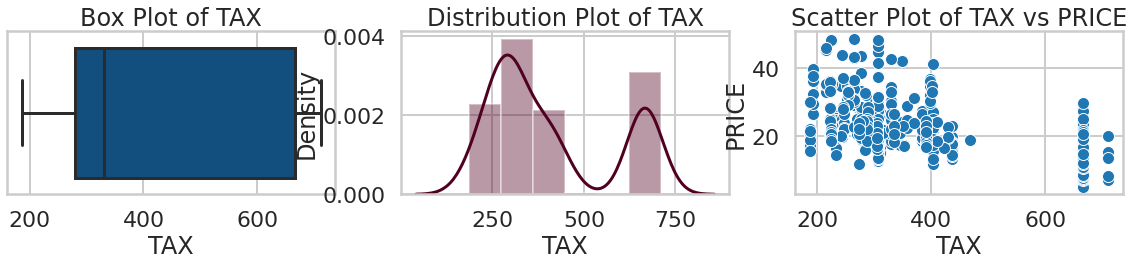

In [32]:
#Box Plot, Distribution Plot and Scatter Plot for TAX
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(boston_df2.TAX,color='#005090')
plt.title('Box Plot of TAX')

plt.subplot(1,3,2)
sns.distplot(a = boston_df2.TAX,color='#500020')
plt.title('Distribution Plot of TAX')

plt.subplot(1,3,3)
sns.scatterplot(boston_df2.TAX,boston_df2.PRICE)
plt.title('Scatter Plot of TAX vs PRICE')

plt.show()

- TAX doesn't have Normal Distribution.
- Despite the fact that there are no outliers in boxplot for PRICE, instead there are some TAX values that are too high.
- From the scatter plot we see that these high TAX values are for PRICE values range from low to high.


In [33]:
temp_df = boston_df2[boston_df1['TAX']>600].sort_values(by=['RM','PRICE'])
temp_df.shape

/tmp/ipykernel_4476/2071949752.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = boston_df2[boston_df1['TAX']>600].sort_values(by=['RM','PRICE'])


(132, 5)

There are total 132 entries in TAX mostly having value 666 which I thinks is a DEVIL'S number. Now lets deep dive inside them.

In [34]:
temp_df

RM    TAX  PTRATIO  LSTAT  PRICE
365  3.561  666.0     20.2   7.12   27.5
367  3.863  666.0     20.2  13.33   23.1
406  4.138  666.0     20.2  23.34   11.9
374  4.138  666.0     20.2  37.97   13.8
384  4.368  666.0     20.2  30.63    8.8
..     ...    ...      ...    ...    ...
473  6.980  666.0     20.2  11.66   29.8
482  7.061  666.0     20.2   7.01   25.0
375  7.313  666.0     20.2  13.44   15.0
453  7.393  666.0     20.2  16.74   17.8
364  8.780  666.0     20.2   5.29   21.9

[132 rows x 5 columns]

In [35]:
temp_df.describe()

RM         TAX     PTRATIO       LSTAT       PRICE
count  132.000000  132.000000  132.000000  132.000000  132.000000
mean     6.000689  667.704545   20.196212   19.167045   14.994697
std      0.712621    8.623365    0.019163    6.483094    5.405825
min      3.561000  666.000000   20.100000    5.290000    5.000000
25%      5.674250  666.000000   20.200000   14.647500   10.900000
50%      6.139500  666.000000   20.200000   18.100000   14.100000
75%      6.407250  666.000000   20.200000   23.275000   19.200000
max      8.780000  711.000000   20.200000   37.970000   29.800000

**What did we Observe?**

- RM for these entries lies between 3.5 to 8.78.
- PTRATIO for almost all of these entries is same and equal to 20.20.
- LSTAT for these entries lies between 2.96 to 37.97.
- PRICE for these entries lies between 5 to 29.80.
- All of the above observations are quite unusual, it isn't possible to have such high TAX values for all these houses.
- These values most likely missing values which were imputed casually by someone.

**Concluson for Observations**

- Since LSTAT is most correlated to TAX as seen above in Heatmap, so we will replace those 132 TAX values with mean of remaining TAX values dividing in some intervals with the help of LSTAT.
- Interval 1: TAX_10 -> Replacing extreme TAX values having LSTAT is between 0 to 10 with mean of other TAX values whose LSTAT is between 0 to 10.
- Interval 2: TAX_20 -> Replacing extreme TAX values having LSTAT is between 10 to 20 with mean of other TAX values whose LSTAT is between 10 to 20.
- Interval 3: TAX_30 -> Replacing extreme TAX values having LSTAT is between 20 to 30 with mean of other TAX values whose LSTAT is between 20 to 30.
- Interval 4: TAX_40 -> Replacing extreme TAX values having LSTAT >= 30 with mean of other TAX values whose LSTAT >= 30.

In [36]:
TAX_10 = boston_df2[(boston_df2['TAX']<600) & (boston_df2['LSTAT']>=0) & (boston_df2['LSTAT']<10)]['TAX'].mean()
TAX_20 = boston_df2[(boston_df2['TAX']<600) & (boston_df2['LSTAT']>=10) & (boston_df2['LSTAT']<20)]['TAX'].mean()
TAX_30 = boston_df2[(boston_df2['TAX']<600) & (boston_df2['LSTAT']>=20) & (boston_df2['LSTAT']<30)]['TAX'].mean()
TAX_40 = boston_df2[(boston_df2['TAX']<600) & (boston_df2['LSTAT']>=30)]['TAX'].mean()

indexes = list(boston_df2.index)
for i in indexes:
    if boston_df2['TAX'][i] > 600:
        if (0 <= boston_df2['LSTAT'][i] < 10):
            boston_df2.at[i,'TAX'] = TAX_10
        elif (10 <= boston_df2['LSTAT'][i] < 20):
            boston_df2.at[i,'TAX'] = TAX_20
        elif (20 <= boston_df2['LSTAT'][i] < 30):
            boston_df2.at[i,'TAX'] = TAX_30
        elif (boston_df2['LSTAT'][i] >30):
            boston_df2.at[i,'TAX'] = TAX_40

print('Values Successfully Imputed')

Values Successfully Imputed


In [37]:
#This show all those extreme TAX values are replaced successfully
boston_df2[boston_df2['TAX']>600]['TAX'].count()

0

This shows that those values are replaced succesfully :)



/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


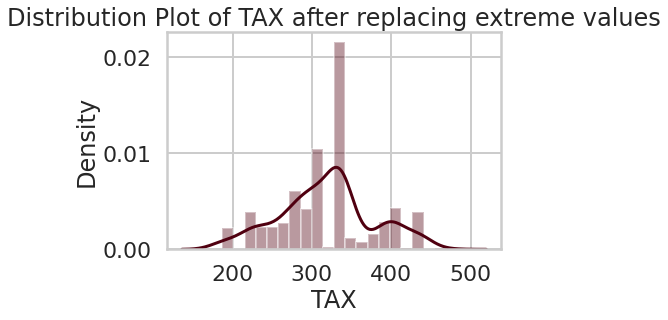

In [38]:
sns.distplot(a = boston_df2.TAX,color='#500010')
plt.title('Distribution Plot of TAX after replacing extreme values')
plt.show()

#### Analyzing the PTRATIO

/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explici

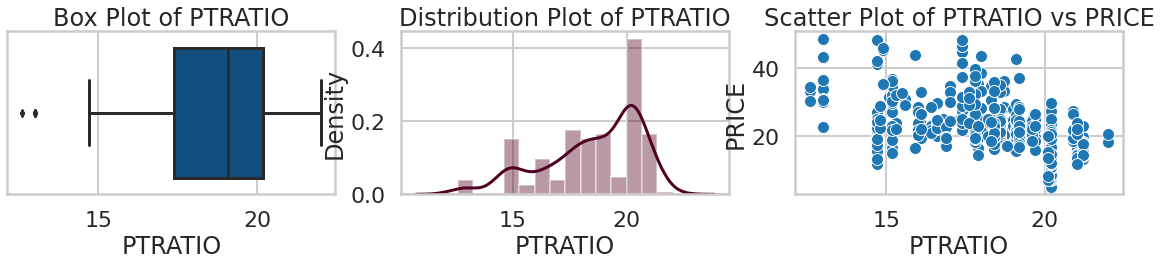

In [39]:
#Box Plot, Distribution Plot and Scatter Plot for PTRATIO
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(boston_df2.PTRATIO,color='#005090')
plt.title('Box Plot of PTRATIO')

plt.subplot(1,3,2)
sns.distplot(a = boston_df2.PTRATIO,color='#500020')
plt.title('Distribution Plot of PTRATIO')

plt.subplot(1,3,3)
sns.scatterplot(boston_df2.PTRATIO,boston_df2.PRICE)
plt.title('Scatter Plot of PTRATIO vs PRICE')

plt.show()

- PTRATIO is NOT normally distributed
- There are few low PRATIO values in the dataset.

In [40]:
boston_df2[boston_df2['PTRATIO']<14].sort_values(by=['LSTAT','PRICE'])

RM    TAX  PTRATIO  LSTAT  PRICE
268  7.470  264.0     13.0   3.16   43.5
196  7.287  329.0     12.6   4.08   33.3
262  8.398  264.0     13.0   5.91   48.8
198  7.274  329.0     12.6   6.62   34.6
259  6.842  264.0     13.0   6.90   30.1
261  7.520  264.0     13.0   7.26   43.1
258  7.333  264.0     13.0   7.79   36.0
264  7.206  264.0     13.0   8.10   36.5
197  7.107  329.0     12.6   8.61   30.3
260  7.203  264.0     13.0   9.59   33.8
265  5.560  264.0     13.0  10.45   22.8
263  7.327  264.0     13.0  11.25   31.0
266  7.014  264.0     13.0  14.79   30.7

**What did we Observe?**

- PTRATIO for all above data points is same.
- RM and PRICE is increasing simultaneously, as RM and PRICE are positively correlated, which is fine.
- As LSTAT increases PRICE decreases, which follows negative correlation.

**Conclusion for Obsevations**

- We don't observe any abnormalities, so we will keep the data.

#### Analyzing LSTAT

/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explici

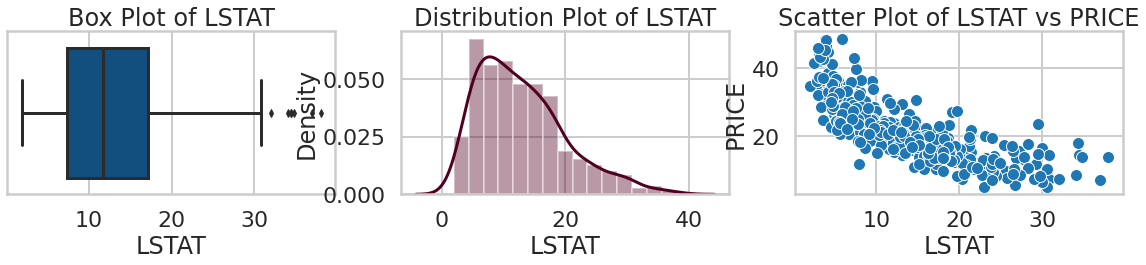

In [41]:
#Box Plot, Distribution Plot and Scatter Plot for LSTAT
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(boston_df2.LSTAT,color='#005090')
plt.title('Box Plot of LSTAT')

plt.subplot(1,3,2)
sns.distplot(a=boston_df2.LSTAT,color='#500020')
plt.title('Distribution Plot of LSTAT')

plt.subplot(1,3,3)
sns.scatterplot(boston_df2.LSTAT,boston_df2.PRICE)
plt.title('Scatter Plot of LSTAT vs PRICE')

plt.show()

- LSTAT is normally distributed and skewed to right.
- There are some high LSTAT values in the dataset which we will analyse.

In [42]:
LSTAT_Q3 = desc['LSTAT']['75%']
LSTAT_Q1 = desc['LSTAT']['25%']
LSTAT_IQR = LSTAT_Q3 - LSTAT_Q1
LSTAT_UV = LSTAT_Q3 + 1.5*LSTAT_IQR
LSTAT_LV = LSTAT_Q1 - 1.5*LSTAT_IQR

boston_df2[boston_df2['LSTAT']>LSTAT_UV].sort_values(by='LSTAT')

RM    TAX  PTRATIO  LSTAT  PRICE
387  5.000  335.0     20.2  31.99    7.4
438  5.935  335.0     20.2  34.02    8.4
412  4.628  335.0     20.2  34.37   17.9
141  5.019  437.0     21.2  34.41   14.4
373  4.906  335.0     20.2  34.77   13.8
414  4.519  335.0     20.2  36.98    7.0
374  4.138  335.0     20.2  37.97   13.8

**What did we Observe?** 

- From above data, we see that since LSAT value for these 7 houses is high, resulting in low PRICE, which follows the negative correaltion and is True.
- RM is low and TAX is little higher which means low PRICE and which is True.

**Conclusion to Observations**

- We don't observe any abnormalities, so we will keep the data.

#### Analyzing RM

/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explici

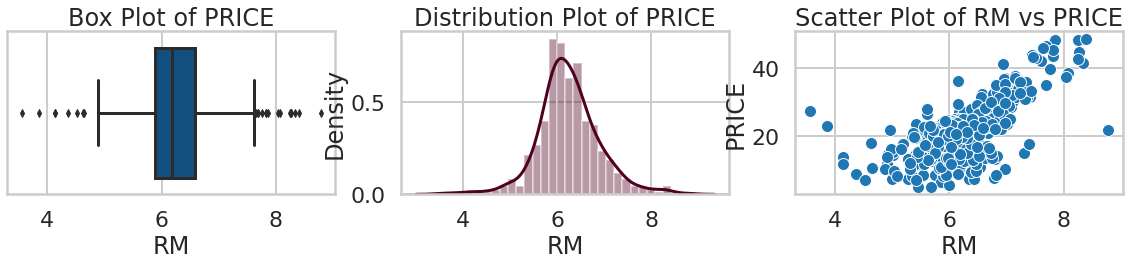

In [43]:
#Box Plot, Distribution Plot and Scatter Plot for RM
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(boston_df2.RM,color='#005090')
plt.title('Box Plot of PRICE')

plt.subplot(1,3,2)
sns.distplot(a = boston_df2.RM,color='#500020')
plt.title('Distribution Plot of PRICE')

plt.subplot(1,3,3)
sns.scatterplot(boston_df2.RM,boston_df2.PRICE)
plt.title('Scatter Plot of RM vs PRICE')

plt.show()

- RM is normally distributed .
- There are some low and high RM values in the dataset which we will analyse.
- Scatter plot of RM vs PRICE show good Positive Linear Relationship.

In [44]:
RM_Q3 = desc['RM']['75%']
RM_Q1 = desc['RM']['25%']
RM_IQR = RM_Q3 - RM_Q1
RM_UV = RM_Q3 + 1.5*RM_IQR
RM_LV = RM_Q1 - 1.5*RM_IQR

boston_df2[boston_df2['RM']<RM_LV].sort_values(by=['RM','PRICE'])

RM         TAX  PTRATIO  LSTAT  PRICE
365  3.561  293.914141     20.2   7.12   27.5
367  3.863  334.330882     20.2  13.33   23.1
406  4.138  338.636364     20.2  23.34   11.9
374  4.138  335.000000     20.2  37.97   13.8
384  4.368  335.000000     20.2  30.63    8.8
414  4.519  335.000000     20.2  36.98    7.0
412  4.628  335.000000     20.2  34.37   17.9
386  4.652  338.636364     20.2  28.28   10.5

**What did we Observe?**

- We are more concerned on two data points (row index 365 & 367) where PRICE is higher while RM is very low, though RM and PRICE are positively correlated.
- Also for these two data points TAX and PTRATIO are above 50% of data points respectively, though both are negatively correlated to MEDV.
- For rest data points, we don't see any unusual behaviour.

**Conclusion to Observations** 

- We will delete those two data points (row index 365 & 367) as it may influence the prediction capability of our model.
- Also we will keep all other data points.

In [45]:
print(f'Shape of dataset before removing data points: {boston_df2.shape}')
boston_df3 = boston_df2.drop(axis=0,index=[365,367])
print(f'Shape of dataset after removing data points: {boston_df3.shape}')

Shape of dataset before removing data points: (490, 5)
Shape of dataset after removing data points: (488, 5)


We can see in the difference of shape of dataset after removing two data points (outliers).



In [46]:
boston_df3[boston_df3['RM']>RM_UV].sort_values(by=['RM','PRICE'])

RM         TAX  PTRATIO  LSTAT  PRICE
180  7.765  193.000000     17.8   7.56   39.8
98   7.820  276.000000     18.0   3.57   43.8
280  7.820  216.000000     14.9   3.76   45.4
203  7.853  224.000000     14.7   3.81   48.5
226  8.040  307.000000     17.4   3.13   37.6
97   8.069  276.000000     18.0   4.21   38.7
233  8.247  307.000000     17.4   3.95   48.3
253  8.259  330.000000     19.1   3.54   42.8
224  8.266  307.000000     17.4   4.14   44.8
232  8.337  307.000000     17.4   2.47   41.7
262  8.398  264.000000     13.0   5.91   48.8
364  8.780  293.914141     20.2   5.29   21.9

**What did we Observe?**

- In the above data points, we see one data point only (row index 364) where PRICE is very low while RM is very high, though RM and PRICE are positively correlated.
- Also for this data point LSTAT is low and PRICE is also low, though both are negatively correlated.
- For rest data points,there isn't any unusual behaviour.

**Conclusion to Observations**

- We will delete the data point (row index 364) as this could be human error while inputting the data.
- Also we will keep all other points.

In [47]:
print(f'Shape of dataset before removing data points: {boston_df3.shape}')
boston_df3 = boston_df3.drop(axis=0,index=[364])
print(f'Shape of dataset after removing data points: {boston_df3.shape}')

Shape of dataset before removing data points: (488, 5)
Shape of dataset after removing data points: (487, 5)


We can see in the difference of shape of dataset after removing one data point (outlier).

Now, we are done with univariate and multivariate analysis and now our data is ready to put into the Black Box i.e. model.

But before doing that we need to split our data into Training set and Test set and then we will make our model on Training set and test its accracy on Test set.

## Splitting the dataset into Train and Test data

In [48]:
boston_df3

RM    TAX  PTRATIO  LSTAT  PRICE
0    6.575  296.0     15.3   4.98   24.0
1    6.421  242.0     17.8   9.14   21.6
2    7.185  242.0     17.8   4.03   34.7
3    6.998  222.0     18.7   2.94   33.4
4    7.147  222.0     18.7   5.33   36.2
..     ...    ...      ...    ...    ...
501  6.593  273.0     21.0   9.67   22.4
502  6.120  273.0     21.0   9.08   20.6
503  6.976  273.0     21.0   5.64   23.9
504  6.794  273.0     21.0   6.48   22.0
505  6.030  273.0     21.0   7.88   11.9

[487 rows x 5 columns]

In [49]:
# Spliting target variable and independent variables
X = boston_df3.drop(['PRICE'], axis = 1)
y = boston_df3['PRICE']

In [50]:
X

RM    TAX  PTRATIO  LSTAT
0    6.575  296.0     15.3   4.98
1    6.421  242.0     17.8   9.14
2    7.185  242.0     17.8   4.03
3    6.998  222.0     18.7   2.94
4    7.147  222.0     18.7   5.33
..     ...    ...      ...    ...
501  6.593  273.0     21.0   9.67
502  6.120  273.0     21.0   9.08
503  6.976  273.0     21.0   5.64
504  6.794  273.0     21.0   6.48
505  6.030  273.0     21.0   7.88

[487 rows x 4 columns]

In [51]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 487, dtype: float64

In [52]:
print(f"Shape of Dependent Variable X = {X.shape}")
print(f"Shape of Independent Variable y = {y.shape}")

Shape of Dependent Variable X = (487, 4)
Shape of Independent Variable y = (487,)


In [53]:
X = X.values
y = y.values

In [54]:
X = X.astype('float32')
y = y.astype('float32')

In [55]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [56]:
print(f"Shape of X_train = {X_train.shape}")
print(f"Shape of X_test = {X_test.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of y_test = {y_test.shape}")

Shape of X_train = (340, 4)
Shape of X_test = (147, 4)
Shape of y_train = (340,)
Shape of y_test = (147,)


## Train, Deploy and Predict

### Bringing in SageMaker



In [57]:
# sagemaker session, role
sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()

In [58]:
# import LinearLearner
from sagemaker import LinearLearner

# specify an output path
bucket = 'boston-ml'
prefix = 'housePrice'
output_path = 's3://{}/{}'.format(bucket, prefix)

# instantiate LinearLearner
linear = LinearLearner(role=role,
                       instance_count=1, 
                       instance_type='ml.m4.xlarge',
                       predictor_type='regressor',
                       output_path=output_path,
                       sagemaker_session=sagemaker_session,
                       epochs=300,
                       num_models = 32,
                       loss = 'absolute_loss',
                       use_spot_instances = True,
                       max_run=300,
                       max_wait=600,
                      )

## 4. Training the Model

In [59]:
formatted_train_data = linear.record_set(X_train, labels=y_train)

In [60]:
formatted_validation_data = linear.record_set(X_test, labels=y_test, channel='validation')

In [61]:
linear.fit([formatted_train_data,formatted_validation_data])

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


2022-09-26 03:49:07 Starting - Starting the training job...ProfilerReport-1664164147: InProgress
......
2022-09-26 03:50:30 Starting - Preparing the instances for training......
2022-09-26 03:51:31 Downloading - Downloading input data...
2022-09-26 03:51:53 Training - Downloading the training image...........Docker entrypoint called with argument(s): train
Running default environment configuration script
[09/26/2022 03:53:47 INFO 140548896671552] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss': 'auto', 'margin': '1.0', 'quantile': '0.5

## 5. Deploying the Model

In [62]:
linear_regressor = linear.deploy(initial_instance_count=1, instance_type='ml.t2.medium')


Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


-----------------!

## 6. Price Prediction

In [63]:
from sagemaker.predictor import csv_serializer, json_deserializer


linear_regressor.ContentType='text/csv'
linear_regressor.serializer = csv_serializer
linear_regressor.deserializer = json_deserializer

In [64]:
# making prediction on the test data
result = linear_regressor.predict(X_test)
result

The csv_serializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
The json_deserializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


{'predictions': [{'score': 17.205795288085938},
  {'score': 15.018478393554688},
  {'score': 19.284395217895508},
  {'score': 22.87039566040039},
  {'score': 19.194271087646484},
  {'score': 18.20970344543457},
  {'score': 24.490013122558594},
  {'score': 33.02701187133789},
  {'score': 24.66339111328125},
  {'score': 18.060466766357422},
  {'score': 23.311126708984375},
  {'score': 10.602262496948242},
  {'score': 17.638946533203125},
  {'score': 7.881355285644531},
  {'score': 15.085014343261719},
  {'score': 16.994991302490234},
  {'score': 20.59351921081543},
  {'score': 27.184532165527344},
  {'score': 17.346010208129883},
  {'score': 12.539573669433594},
  {'score': 13.603164672851562},
  {'score': 16.392040252685547},
  {'score': 20.77525520324707},
  {'score': 26.900976181030273},
  {'score': 22.846031188964844},
  {'score': 19.07889175415039},
  {'score': 18.95161247253418},
  {'score': 19.893756866455078},
  {'score': -3.789735794067383},
  {'score': 31.38605499267578},
  {'s

In [65]:
#access the scores by iterating through the scores in predictions
predictions = np.array([r['score'] for r in result['predictions']])
predictions

array([17.20579529, 15.01847839, 19.28439522, 22.87039566, 19.19427109,
       18.20970345, 24.49001312, 33.02701187, 24.66339111, 18.06046677,
       23.31112671, 10.6022625 , 17.63894653,  7.88135529, 15.08501434,
       16.9949913 , 20.59351921, 27.18453217, 17.34601021, 12.53957367,
       13.60316467, 16.39204025, 20.7752552 , 26.90097618, 22.84603119,
       19.07889175, 18.95161247, 19.89375687, -3.78973579, 31.38605499,
       18.63223076, 20.85139656,  3.71243477, 29.97988319, 27.25082207,
       15.59468079, 25.64794731, 15.88711166, 23.11087418, 22.3337574 ,
       17.78508759, 12.4606514 , 17.67363358, 18.42134476, 32.13858795,
       12.46905136, 28.10341454, 30.11422157, 28.46889687, 32.11478424,
       23.30894661, 11.57148743, 24.66352272, 20.14594269, 19.81682014,
       21.18304062, 22.33912659, 28.4166832 , 20.85317612, 13.02049637,
       23.03567696, 20.6037178 , 23.46338654, 23.37886238, 19.59628868,
       30.98975754, 30.89945221, 19.72223663, 17.66161156, 17.98

In [66]:
#compare actual output values with predicted values
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predictions.flatten()})
df

Actual  Predicted
0    12.500000  17.205795
1    11.000000  15.018478
2    21.500000  19.284395
3    18.900000  22.870396
4    14.900000  19.194271
..         ...        ...
142  25.299999  25.317114
143  29.600000  29.029182
144  22.900000  23.261383
145  19.500000  14.992918
146  32.000000  30.442011

[147 rows x 2 columns]

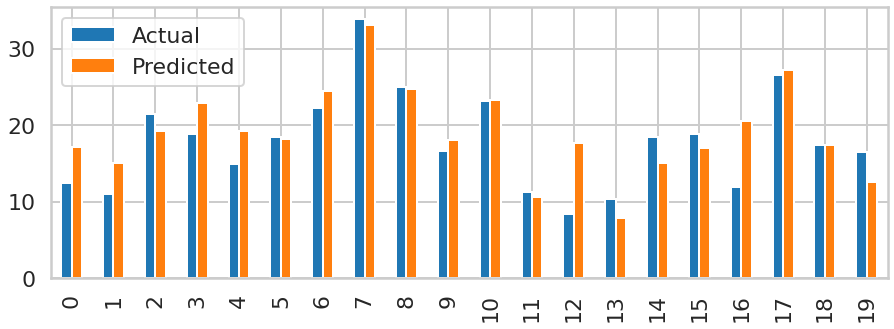

In [67]:
# visualize comparison result as a bar graph
df1 = df.head(20)
df1.plot(kind='bar',figsize=(15,5))
plt.show()

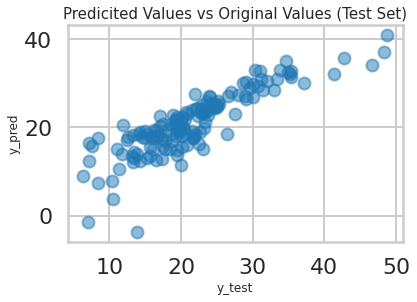

In [68]:
plt.scatter(x=y_test,y=predictions,alpha=0.5)
plt.xlabel('y_test',size=12)
plt.ylabel('y_pred',size=12)
plt.title('Predicited Values vs Original Values (Test Set)',size=15)
plt.show()

## 7. Delete End Point

In [69]:
# Delete the end-point
linear_regressor.delete_endpoint()